In [232]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
# Importing basic math libraries
from math import pi, sqrt

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-23 08:16:34,983: Credentials are already in use. The existing account in the session will be replaced.


In [233]:
# Definining the simulator: statevector_simulator, or qasm_simulator
simulator = "qasm_simulator"

In [234]:
# Function to plot the Quantum Circuit / Quantum State
def get_plot(quantum_circuit):
    """
    Parameters:
    quantum_circuit: The Quantum Circuit to visualize
    Returns:
    return: Plot/Visualization of the Quantum State
    """
    sim = Aer.get_backend(simulator)
    quantum_object = assemble(quantum_circuit)
    if simulator == "statevector_simulator":
        result = sim.run(quantum_object).result()
        statevector = result.get_statevector()
        return plot_bloch_multivector(statevector)
    elif simulator == "qasm_simulator":
        result = sim.run(quantum_object).result()
        count = result.get_counts()
        return plot_histogram(count)

In [235]:
# Creating a single qubit Quantum Circuit
num_qubits = 2
qc = QuantumCircuit(num_qubits) # Creates a Quantum Circuit with 1 qubit
num_input_qubits = num_qubits  # defines the number of qubits in the circuit
num_output_qubits = num_qubits  # defines the number of output bits that we want to extract from the circuit
# Note: The extraction of output from a Quantum Circuit is done via a process called `measurement`
# Each measurement tells a specific qubit to give an output to a specific output bit
qc_output = QuantumCircuit(num_input_qubits, num_output_qubits)  # qc_output is the Quantum Circuit

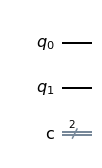

In [236]:
# Visualizing the Quantum Wire
qc_output.draw() # Drawing the Quantum Circuit

In [237]:
# Here C is represents the measurement results / count

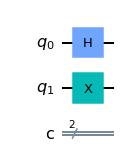

In [238]:
# Applying H-gate to the first qubit q0:
qc_output.h(0)
# Applying X-gate to the first qubit q:
qc_output.x(1)
qc_output.draw() # Drawing the Quantum Circuit

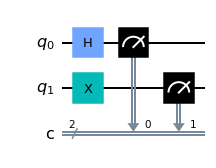

In [239]:
# TAKING MEASUREMENT ONLY FOR EXPLANATION PURPOSES
# IN REAL CIRCUITS, MEASUREMENTS SHOULD NOT BE TAKEN LIKE THIS IN THE INTERMEDIATE STATES
# MEASUREMENT CHANGES THE QUBIT'S STATE

# Measuring the results
for qubit in range(num_qubits):
    qc_output.measure(qubit, qubit)

qc_output.draw() # Drawing the Quantum Circuit

In [240]:
# Initial state of each qubit is |0>

# After Hadamard gate is applied to q0, q0 can be in 0 or 1 state when measured (as Hadamard Gate
# will bring q0 to some superposition state)
# H q0 => |0> -> |0> or |1>

# Applying Pauli-X Gate on q1 will flip its qubit state
# X q1 => |0> -> |1>

# Quantum State analysis for the above circuit
# q0    q1    output
# 0     1     0 1
# 1     1     1 1

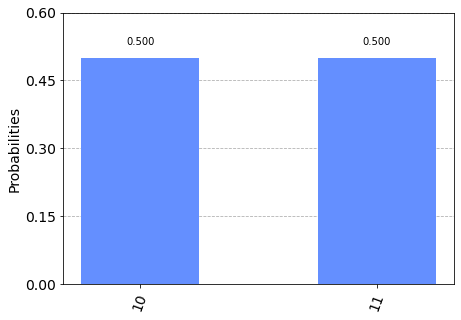

In [241]:
# Getting the plot and visualization
get_plot(qc_output)

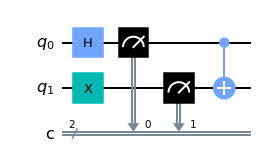

In [242]:
# Applying a CNOT gate from qubit q0 to qubit q1:
qc_output.cx(0,1)
qc_output.draw() # Drawing the Quantum Circuit

In [243]:
# Measuring the results
for qubit in range(num_qubits):
    qc_output.measure(qubit, qubit)

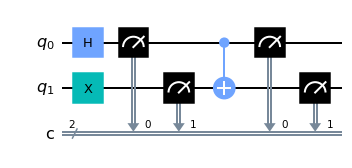

In [244]:
# Visualizing the Quantum Circuit using Simulator
qc_output.draw() # Drawing the Quantum Circuit

In [245]:
# Quantum State analysis for the previously measure circuit
# q0    q1    output
# 0     1     0 1
# 1     1     1 1

# Applying CNOT Gate on from q0 to q1 will conditionally flip the q1 qubit
# q0    q1    output
# 0     1     0 1
# 1     1     1 0



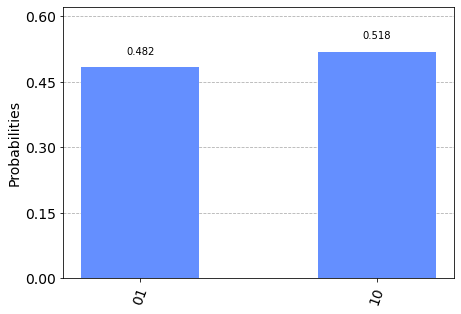

In [231]:
# Getting the plot and visualization
get_plot(qc_output)